In [1]:
import pandas as pd
df = pd.read_csv('letter_recognition.csv')

In [2]:
df.head()

,letter,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
x = df.drop('letter',axis=1)
y = df['letter']
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
le = LabelEncoder()
x  = sc.fit_transform(x)
y = le.fit_transform(y)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential([
    Input(shape=(x.shape[1],)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(26,activation='softmax'),
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping (
    patience=2,
    verbose=1,
    monitor='val_accuracy',
    restore_best_weights=True
)
history=model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3194 - loss: 2.4724 - val_accuracy: 0.6990 - val_loss: 1.0303
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7301 - loss: 0.9303 - val_accuracy: 0.7990 - val_loss: 0.7293
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7990 - loss: 0.7077 - val_accuracy: 0.8257 - val_loss: 0.6065
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8283 - loss: 0.6000 - val_accuracy: 0.8595 - val_loss: 0.5201
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8502 - loss: 0.5211 - val_accuracy: 0.8683 - val_loss: 0.4646
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8663 - loss: 0.4614 - val_accuracy: 0.8817 - val_loss: 0.4216
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8811 - loss: 0.4139 - val_accuracy: 0.8882 - val_loss: 0.3857
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8877 - loss: 0.3716 - val_accu

In [14]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step


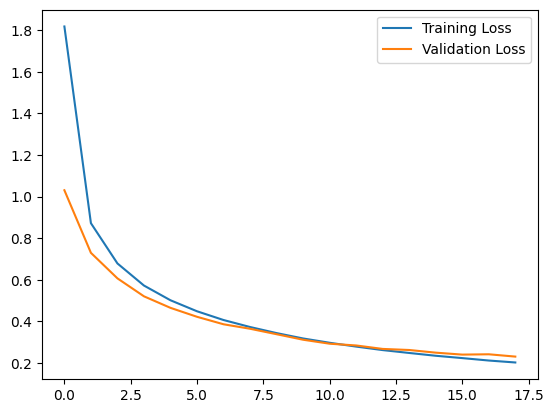

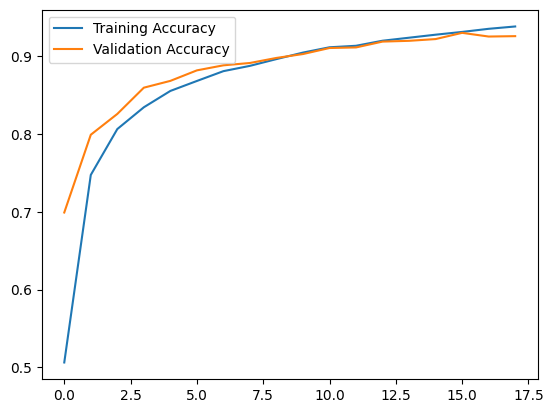

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [25]:
import numpy as np
names = np.sort(df['letter'].unique())
print(names)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [29]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,y_pred,target_names=names))

              precision    recall  f1-score   support

           A       0.97      0.95      0.96       149
           B       0.86      0.91      0.88       153
           C       0.91      0.93      0.92       137
           D       0.91      0.92      0.92       156
           E       0.89      0.95      0.92       141
           F       0.92      0.90      0.91       140
           G       0.91      0.90      0.90       160
           H       0.92      0.76      0.84       144
           I       0.93      0.93      0.93       146
           J       0.97      0.95      0.96       149
           K       0.92      0.87      0.89       130
           L       0.98      0.93      0.95       155
           M       0.93      0.98      0.95       168
           N       0.95      0.91      0.93       151
           O       0.94      0.94      0.94       145
           P       0.95      0.93      0.94       173
           Q       0.97      0.94      0.96       166
           R       0.78    

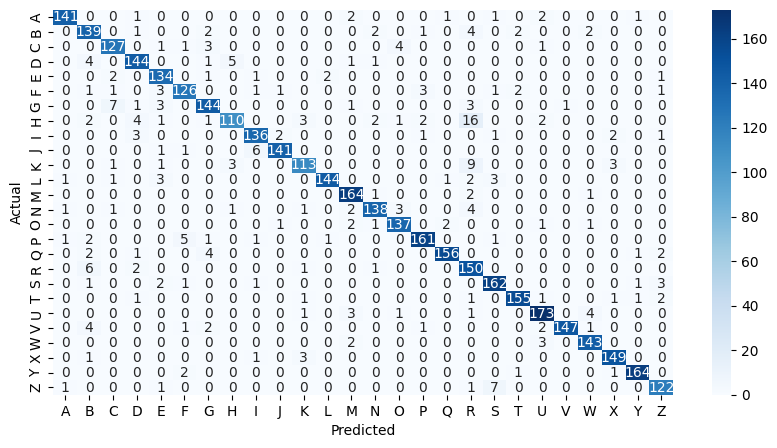

In [30]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)

import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(cm,cmap='Blues',annot=True,fmt='d',xticklabels=names,yticklabels=names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()